# Шаблоны проектирования ООП

*Дисклеймер: в блокноте использованы материалы лекции Алексея Петрова по шаблонам проектирования из курса углубленного программирования на C++ в образовательном проекте Технопарк Mail.Ru & МГТУ*

*Источники:*
* <a href="https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D1%8F:%D0%A8%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD%D1%8B_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F">Википедия</a>
* <a href="https://refactoring.guru/ru/design-patterns/catalog">Очень крутой сайт, с которого я брал картинки</a>

**Шаблон (паттерн) проектирования** — повторяемая архитектурная конструкция, представляющая собой решение проблемы проектирования в рамках некоторого часто возникающего контекста.

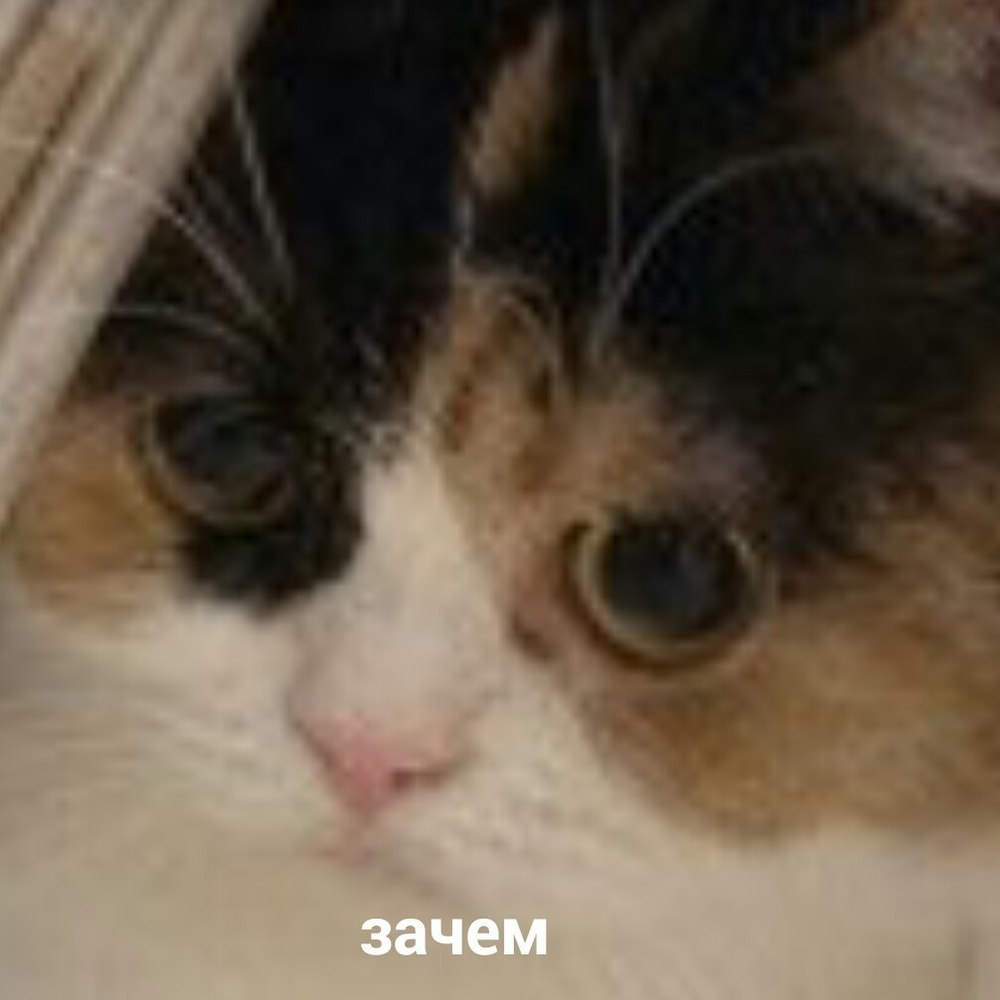

- повышение качества кода
- улучшение документации
- повышение качества сопровождения ПО

## Классификация шаблонов

- **порождающие** - описывают процессы создания объектов
- **структурные** - описывают способы композиции классов/объектов
- **поведенческие** - описывают взаимодействие классов/объектов между собой

## Стек шаблонов

 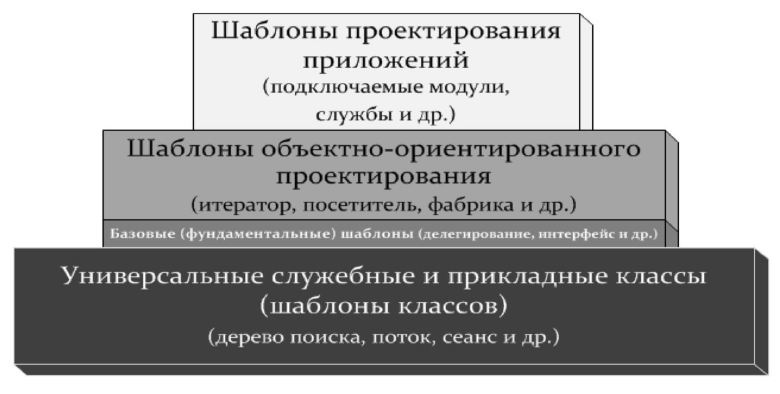
 
## Наследование и композиция

- **Наследование** - определение подкласса
- **Композиция** - определение атрибута

# Базовые шаблоны

## Делегирование

**Делегирование** - передача ответственности за выполненение запроса от *делегатора* к *делегату*.

- Назначение делегирования - абстрагирование поведения объекта/класса.
- Плюс: упрощение композиции поведений объектов на стадии выполнения кода.
- Минус: трудность анализа и понимания кода.

In [ ]:
class A:
    def f(self):
        print('A : вызываем метод f')
        
    def g(self):
        print('A : вызываем метод g')
        
        
class C:
    def __init__(self):
        self.a = A()
        
    def f(self):
        return self.a.f()
    
    def g(self):
        return self.a.g()


c = C()
c.f()
c.g()

## Неизменяемый объект

**Неизменяемый объект** - шаблон, который подразумевает создание объекта, структурно не допускающего модификацию. При этом сам объект может быть изменяемым, но не должен предоставлять интерфейс для его изменения.

- Назначение - устранение дорогостоящих операций копирования и сравнения объектов.

In [ ]:
class A:
    __slots__ = ("_x", "_y")
    
    def __init__(self, x, y):
        self._x = x
        self._y = y
        
    @property
    def x(self):
        return self._x
    
    @property
    def y(self):
        return self._y
    
a = A(1, 2)
a.x = 3

## Интерфейс

**Интерфейс** - шаблон, структурирующий способы доступа к одному или нескольким классам. Интерфейс часто можно рассматривать как абстрактный класс.

- Назначение - повторное использование абстрактного типа данных.
- Достоинство: обеспечение возможности динамической замены классов, реализующих интерфейс.

In [ ]:
import abc

class A(metaclass=abc.ABCMeta):
    
    @abc.abstractmethod
    def xa(self):
        pass
    
    @abc.abstractmethod
    def ya(self):
        pass
    
    
class B():
    def xb(self):
        print("xb")
    
    def yb(self):
        print("yb")
    

class C(A, B):
    def xa(self):
        print("xa C")
        
    def xb(self):
        print("xb C")
        
    def ya(self):
        print("ya C")
        
    def yb(self):
        print("yb C")
        
        
class D(A, B):
    def xa(self):
        print("xa D")
        
    def xb(self):
        print("xb D")
        
    def ya(self):
        print("ya D")
        
    def yb(self):
        print("yb D")

# Порождающие шаблоны

- абстрагируют процессы создания объектов и инкапсулируют сведения об инстанцируемых классах
- обеспечивают независимость системы от способа создания, композиции и представления объектов
- наиболее важны для систем, основанных на композиции больше, чем на наследовании

### Типология

- абстрактная фабрика
- фабричный метод
- строитель (builder)
- прототип
- синглтон

## Абстрактная фабрика

**Абстрактная фабрика** - шаблон уровня объекта, предоставляющий интерфейс для создания семейств взаимосвязанных объектов.

Назначение:
- если система не должна зависеть от способов создания, компоновки и представления объектов
- объекты разных семейств не должны использоваться совместно
- используемое семейство объектов должно являться параметром конфигурации объектов

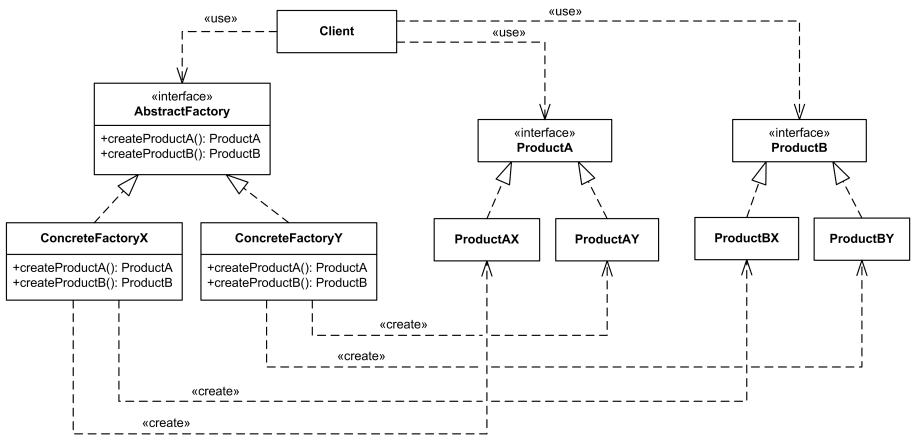

In [ ]:
from abc import ABCMeta, abstractmethod


# drinks
class Beer(metaclass=ABCMeta):
    pass


class Tuborg(Beer):
    pass


class Staropramen(Beer):
    pass


# snacks
class Snack(metaclass=ABCMeta):
    @abstractmethod
    def interact(self, beer: Beer) -> None:
        pass
    
    
class Peanuts(Snack):
    def interact(self, beer: Beer) -> None:
        print('Мы выпили по бутылке пива {} и закусили его арахисом'.format(
            beer.__class__.__name__))


class Chips(Snack):
    def interact(self, beer: Beer) -> None:
        print('Мы выпили несколько банок пива {} и съели пачку чипсов'.format(
            beer.__class__.__name__))


# shops
class AbstractShop(metaclass=ABCMeta):
    @abstractmethod
    def buy_beer(self) -> Beer:
        pass

    @abstractmethod
    def buy_snack(self) -> Snack:
        pass


class ExpensiveShop(AbstractShop):
    def buy_beer(self) -> Beer:
        return Tuborg()

    def buy_snack(self) -> Snack:
        return Peanuts()


class CheapShop(AbstractShop):
    def buy_beer(self) -> Beer:
        return Staropramen()

    def buy_snack(self) -> Snack:
        return Chips()


expensive_shop = ExpensiveShop()
cheap_shop = CheapShop()
print('OUTPUT:')
beer = expensive_shop.buy_beer()
snack = cheap_shop.buy_snack()
snack.interact(beer)
beer = cheap_shop.buy_beer()
snack = expensive_shop.buy_snack()
snack.interact(beer)

## Фабричный метод

**Фабричный метод** - шаблон уровня класса, определяющий абстрактный интерфейс создания объектов и делегирующий выбор типов инстанцируемых объектов конкретным подклассам.

Применение:
- когда заранее неизвестен тип инстанцируемых объектов
- создаваемые объекты инстанцируются подклассами
- класс делегирует свои обязанности по инстанцированию объектов своему подклассу

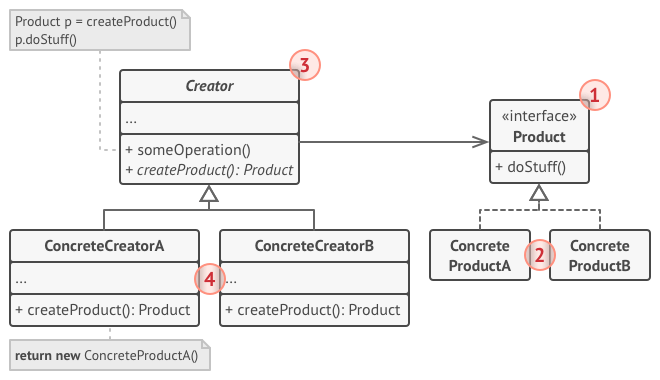

In [ ]:
class Culture:
    """Культура"""
    def __repr__(self):
        return self.__str__()

    
class Democracy(Culture):
    def __str__(self):
        return 'Democracy'

    
class Dictatorship(Culture):
    def __str__(self):
        return 'Dictatorship'

    
class Government:
    """Само правительство"""
    culture = ''
    def __str__(self):
        return self.culture.__str__()

    def __repr__(self):
        return self.culture.__repr__()

    def set_culture(self):
        """Задать строй правительству : это и есть наш Фабричный Метод"""
        raise AttributeError('Not Implemented Culture')

        
class GovernmentA(Government):
    def set_culture(self):
        self.culture = Democracy()

        
class GovernmentB(Government):
    def set_culture(self):
        self.culture = Dictatorship()

        
g1 = GovernmentA()
g1.set_culture()
print(str(g1))

g2 = GovernmentB()
g2.set_culture()
print(str(g2))

## Строитель (builder)

**Строитель** - шаблон уровня объекта, отделяющий конструирование сложного объекта от его представления.

Назначение:
- если алгоритм создания объекта не должен зависеть от состава объекта и способа компоновки его частей
- процесс конструирования объекта должен обеспечивать его различные представления

In [ ]:
from abc import ABC, abstractmethod, abstractproperty
from typing import Any


class Product1:
    def __init__(self) -> None:
        self.parts = []

    def add(self, part: Any) -> None:
        self.parts.append(part)

    def list_parts(self) -> None:
        print(f"Product parts: {', '.join(self.parts)}", end="")


class Builder(ABC):
    @abstractproperty
    def product(self) -> None:
        pass

    @abstractmethod
    def produce_part_a(self) -> None:
        pass

    @abstractmethod
    def produce_part_b(self) -> None:
        pass

    @abstractmethod
    def produce_part_c(self) -> None:
        pass


class ConcreteBuilder1(Builder):
    def __init__(self) -> None:
        self._product = Product1()

    @property
    def product(self) -> Product1:
        product = self._product
        self._product = Product1()
        return product

    def produce_part_a(self) -> None:
        self._product.add("PartA1")

    def produce_part_b(self) -> None:
        self._product.add("PartB1")

    def produce_part_c(self) -> None:
        self._product.add("PartC1")


class Director:
    def __init__(self, builder=None) -> None:
        self._builder = builder

    @property
    def builder(self) -> Builder:
        return self._builder

    @builder.setter
    def builder(self, builder: Builder) -> None:
        self._builder = builder

    def build_minimal_viable_product(self) -> None:
        self.builder.produce_part_a()

    def build_full_featured_product(self) -> None:
        self.builder.produce_part_a()
        self.builder.produce_part_b()
        self.builder.produce_part_c()


if __name__ == "__main__":
    director = Director()
    builder = ConcreteBuilder1()
    director.builder = builder

    print("Standard basic product: ")
    director.build_minimal_viable_product()
    builder.product.list_parts()

    print("\n")

    print("Standard full featured product: ")
    director.build_full_featured_product()
    builder.product.list_parts()

    print("\n")

    print("Custom product: ")
    builder.produce_part_a()
    builder.produce_part_b()
    builder.product.list_parts()

## Прототип

**Прототип** - шаблон уровня объекта, определяющий вид создаваемого объекта при помощи экземпляра-прототипа, который явно копируется при создании объекта. Ну прям как вы обычно курсачи и лабы делаете на учебе

Применение:
- для сокращения усилий по созданию объекта стандартным путем

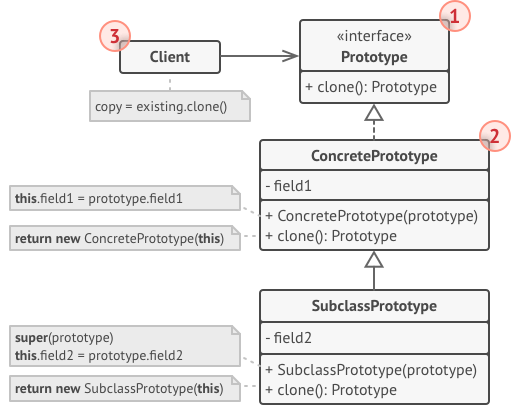

In [ ]:
import copy

class Prototype:
    def __init__(self):
        self._objects = {}

    def register_object(self, name, obj):
        """Register an object"""
        self._objects[name] = obj

    def unregister_object(self, name):
        """Unregister an object"""
        del self._objects[name]

    def clone(self, name, **attr):
        """Clone a registered object and update inner attributes dictionary"""
        obj = copy.deepcopy(self._objects.get(name))
        obj.__dict__.update(attr)
        return obj


class A:
    def __init__(self):
        self.x = 3
        self.y = 8
        self.z = 15
        self.garbage = [38, 11, 19]

    def __str__(self):
        return '{} {} {} {}'.format(self.x, self.y, self.z, self.garbage)

    
if __name__ == '__main__':
    a = A()
    prototype = Prototype()
    prototype.register_object('objecta', a)
    b = prototype.clone('objecta')
    c = prototype.clone('objecta', x=1, y=2, garbage=[88, 1])
    print(*[str(i) for i in (a, b, c)], sep='\n')

## Синглтон

**Синглтон** - шаблон уровня объекта, гарантирующий, что экземпляр этого класса - единственный, с глобальной точкой доступа.

Применение:
- экземпляр класса должен быть один
- экземпляр класса должен быть доступен для любого клиента

In [ ]:
class Singleton(object):
    instance = None
    
    def __new__(cls):
        if cls.instance is None:
            cls.instance = super(Singleton, cls).__new__(cls)
        return cls.instance
    
    
Singleton() is Singleton()

# Структурные шаблоны

- определяют порядок композиции объектов, интерфейсов и реализаций
- абстрагируют процессы построения программных структур, более крупных, чем отдельные классы и экземпляры

### Типология

- адаптер
- декоратор
- мост
- компоновщик
- фасад
- легковес
- заместитель

## Адаптер

**Адаптер** - шаблон уровня класса или объекта, преобразующий интерфейс одного класса в интерфейс другого и обеспечивающий совместную работу классов с несовместимыми интерфейсами.

Применение:

- если необходимо использовать класс с неподходящим интерфейсом
- если используемый класс должен взаимодействовать с разными, в том числе неизвестными, классами с несовместимыми интерфейсами

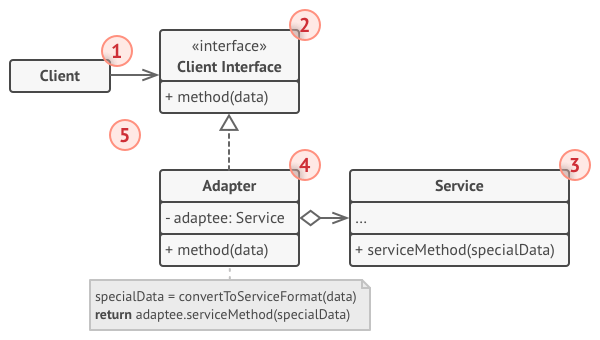

In [ ]:
class GameConsole:
    def create_game_picture(self):
        return 'picture from console'


class Antenna:
    def create_wave_picture(self):
        return 'picture from wave'

    
class SourceGameConsole(GameConsole):
    def get_picture(self):
        return self.create_game_picture()

    
class SourceAntenna(Antenna):
    def get_picture(self):
        return self.create_wave_picture()

    
class TV:
    def __init__(self, source):
        self.source = source
        
    def show_picture(self):
        return self.source.get_picture()

    
g = SourceGameConsole()
a = SourceAntenna()
game_tv = TV(g)
cabel_tv = TV(a)
print(game_tv.show_picture())
print(cabel_tv.show_picture())

## Мост

**Мост** - шаблон уровня объекта, отделяющий абстракцию от ее реализации с тем, чтобы каждая из них могла независимо изменяться, расширяться и использоваться повторно.


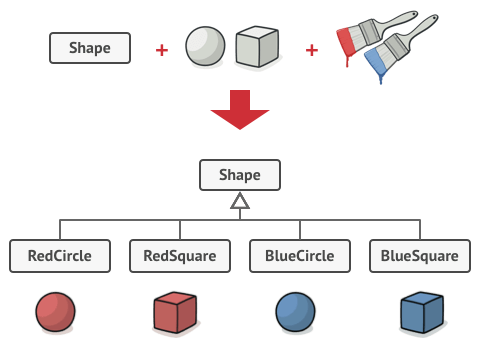

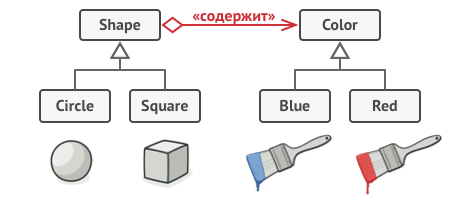

Применение:
- если нужно избежать неразрывной связи абстрации с реализацией
- абстракция и реализация должны расширяться путем наследования
- изменения реализации не должны сказываться на клиентах абстрации
- нужно скрыть реализацию абстрации от клиентов

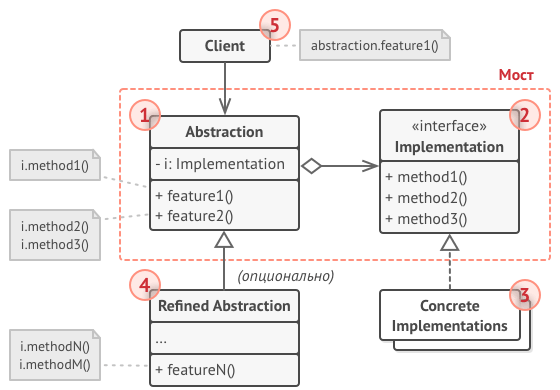

In [ ]:
# Implementor
class DrawingAPI:
    def drawCircle(self, x, y, radius):
        pass


# ConcreteImplementor 1/2
class DrawingAPI1(DrawingAPI):
    def drawCircle(self, x, y, radius):
        print("API1.circle at %f:%f radius %f" % (x, y, radius))


# ConcreteImplementor 2/2
class DrawingAPI2(DrawingAPI):
    def drawCircle(self, x, y, radius):
        print("API2.circle at %f:%f radius %f" % (x, y, radius))


# Abstraction
class Shape:
    # Low-level
    def draw(self):
        pass

    # High-level
    def resizeByPercentage(self, pct):
        pass


# Refined Abstraction
class CircleShape(Shape):
    def __init__(self, x, y, radius, drawingAPI):
        self.__x = x
        self.__y = y
        self.__radius = radius
        self.__drawingAPI = drawingAPI

    # low-level i.e. Implementation specific
    def draw(self):
        self.__drawingAPI.drawCircle(self.__x, self.__y, self.__radius)

    # high-level i.e. Abstraction specific
    def resizeByPercentage(self, pct):
        self.__radius *= pct


if __name__ == '__main__':
    shapes = [
        CircleShape(1, 2, 3, DrawingAPI1()),
        CircleShape(5, 7, 11, DrawingAPI2())
    ]

    for shape in shapes:
        shape.resizeByPercentage(2.5)
        shape.draw()

## Компоновщик

**Компоновщик** - это структурный паттерн проектирования, который позволяет сгруппировать множество объектов в древовидную структуру, а затем работать с ней так, как будто это единичный объект.

Применение:

- если нужно хранить объекты в древовидной структуре
- если нужно обеспечить одинаковую трактовку примитивных и составных типов

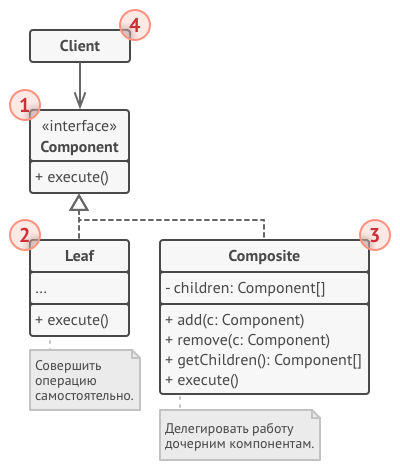

In [ ]:
from abc import ABCMeta, abstractmethod


class Unit(metaclass=ABCMeta):
    @abstractmethod
    def print(self) -> None:
        pass


class Archer(Unit):
    def print(self) -> None:
        print('лучник', end=' ')


class Knight(Unit):
    def print(self) -> None:
        print('рыцарь', end=' ')


class Swordsman(Unit):
    def print(self) -> None:
        print('мечник', end=' ')


class Squad(Unit):
    """
    Компоновщик - отряд, состоящий более чем из одного человека. Также
    может включать в себя другие отряды-компоновщики.
    """

    def __init__(self):
        self._units = []

    def print(self) -> None:
        print("Отряд {} (".format(self.__hash__()), end=' ')
        for u in self._units:
            u.print()
        print(')')

    def add(self, unit: Unit) -> None:
        """
        Добавление нового отряда
        
        :param unit: отряд (может быть как базовым, так и компоновщиком)
        """
        self._units.append(unit)
        unit.print()
        print('присоединился к отряду {}'.format(self.__hash__()))
        print()

    def remove(self, unit: Unit) -> None:
        """
        Удаление отряда из текущего компоновщика
        
        :param unit: объект отряда
        """
        for u in self._units:
            if u == unit:
                self._units.remove(u)
                u.print()
                print('покинул отряд {}'.format(self.__hash__()))
                print()
                break
        else:
            unit.print()
            print('в отряде {} не найден'.format(self.__hash__()))
            print()


if __name__ == '__main__':
    squad = Squad()
    squad.add(Knight())
    squad.add(Knight())
    squad.add(Archer())
    swordsman = Swordsman()
    squad.add(swordsman)
    squad.remove(swordsman)
    squad.print()
    squad_big = Squad()
    squad_big.add(Swordsman())
    squad_big.add(Swordsman())
    squad_big.add(squad)
    squad_big.print()

## Декоратор

**Декоратор** - шаблон уровня объекта, динамически назначающий объекту новый функционал.

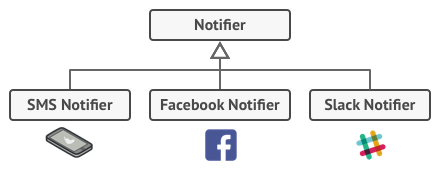

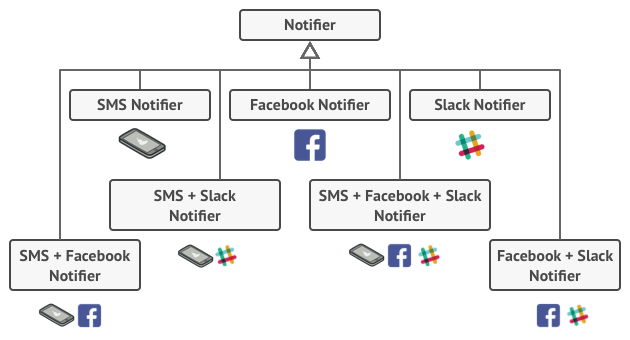

Применение:
- если дополнительный функционал должен динамически добавляться и убираться с объекта
- если неудобно дополнять функционал наследованием

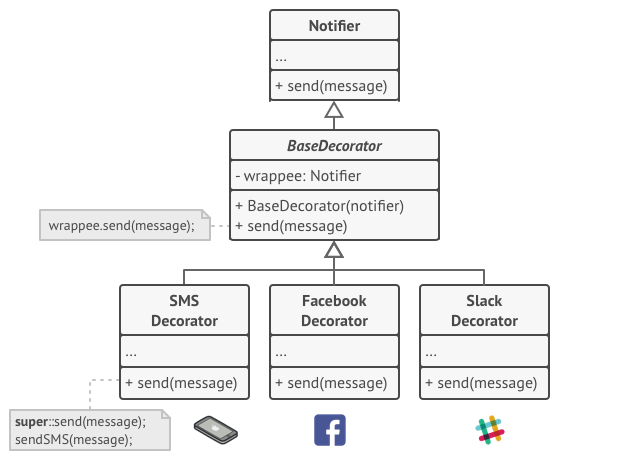

In [ ]:
from abc import ABCMeta, abstractmethod

class IOperator(object):
    """
    Интерфейс, который должны реализовать как декоратор,
    так и оборачиваемый объект.
    """
    __metaclass__ = ABCMeta

    @abstractmethod
    def operator(self):
        pass


class Component(IOperator):
    """Компонент программы"""
    def operator(self):
        return 10.0


class Wrapper(IOperator):
    """Декоратор"""
    def __init__(self, obj):
        self.obj = obj

    def operator(self):
        return self.obj.operator() + 5.0


comp = Component()
comp = Wrapper(comp)
print(comp.operator())

## Фасад

**Фасад** - шаблон уровня объекта, предоставляющий единый упрощенный интерфейс к подсистеме, наряду с интерфейсами конкретных объектов подсистемы.

Применение:
- если требуется простой интерфейс к совокупности объектов
- если нужно изолировать посистему от других подсистем и клиента
- если нужно декомпозировать систему на уровни

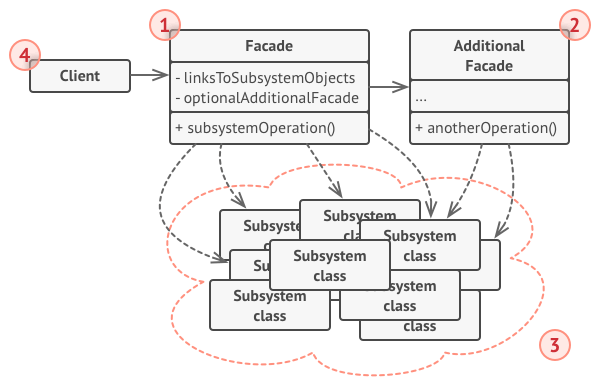

In [ ]:
class Facade:
    def __init__(self, subsystem1, subsystem2) -> None:
        self._subsystem1 = subsystem1 or Subsystem1()
        self._subsystem2 = subsystem2 or Subsystem2()

    def operation(self) -> str:
        results = []
        results.append("Facade initializes subsystems:")
        results.append(self._subsystem1.operation1())
        results.append(self._subsystem2.operation1())
        results.append("Facade orders subsystems to perform the action:")
        results.append(self._subsystem1.operation_n())
        results.append(self._subsystem2.operation_z())
        return "\n".join(results)


class Subsystem1:
    def operation1(self) -> str:
        return "Subsystem1: Ready!"

    def operation_n(self) -> str:
        return "Subsystem1: Go!"


class Subsystem2:
    def operation1(self) -> str:
        return "Subsystem2: Get ready!"

    def operation_z(self) -> str:
        return "Subsystem2: Fire!"


def client_code(facade: Facade) -> None:
    print(facade.operation(), end="")


if __name__ == "__main__":
    # В клиентском коде могут быть уже созданы некоторые объекты подсистемы. В
    # этом случае может оказаться целесообразным инициализировать Фасад с этими
    # объектами вместо того, чтобы позволить Фасаду создавать новые экземпляры.
    subsystem1 = Subsystem1()
    subsystem2 = Subsystem2()
    facade = Facade(subsystem1, subsystem2)
    client_code(facade)

## Proxy (заместитель)

**Заместитель** - шаблон уровня объекта, реализующий суррогатный объект и контролирующий доступ к предоставляемому объекту.

Применение:
- если нужно локально предоставить объект из другого адресного пространства
- если не всегда нужно полностью использовать тяжеловесный объект
- если требуется дополнительный контроль доступа к объекту
- всякое вроде подсчета ссылок, управления блокировками и т.д.

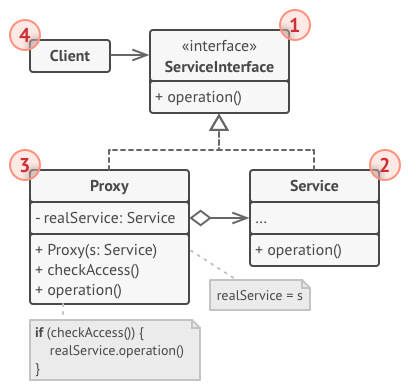

In [ ]:
class IMath:
    """Интерфейс для прокси и реального субъекта"""
    def add(self, x, y):
        raise NotImplementedError()

    def sub(self, x, y):
        raise NotImplementedError()

    def mul(self, x, y):
        raise NotImplementedError()

    def div(self, x, y):
        raise NotImplementedError()

class Math(IMath):
    """Реальный субъект"""
    def add(self, x, y):
        return x + y

    def sub(self, x, y):
        return x - y

    def mul(self, x, y):
        return x * y

    def div(self, x, y):
        return x / y

class Proxy(IMath):
    """Прокси"""
    def __init__(self):
        self.math = None

    # Быстрые операции - не требуют реального субъекта
    def add(self, x, y):
        return x + y

    def sub(self, x, y):
        return x - y
    
    # Медленная операция - требует создания реального субъекта
    def mul(self, x, y):
        if not self.math:
            self.math = Math()
        return self.math.mul(x, y)

    def div(self, x, y):
        if y == 0:
            return float('inf') # Вернуть positive infinity
        if not self.math:
            self.math = Math()
        return self.math.div(x, y)

p = Proxy()
x, y = 4, 2
print('4 + 2 = ' + str(p.add(x, y)))
print('4 - 2 = ' + str(p.sub(x, y)))
print('4 * 2 = ' + str(p.mul(x, y)))
print('4 / 2 = ' + str(p.div(x, y)))

## Приспособленец

**Легковес** — это структурный паттерн проектирования, который позволяет вместить бóльшее количество объектов в отведённую оперативную память. Легковес экономит память, разделяя общее состояние объектов между собой, вместо хранения одинаковых данных в каждом объекте.

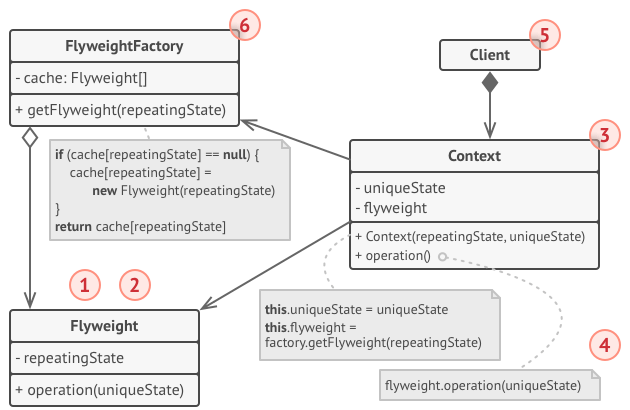

In [ ]:
import json
from typing import Dict


class Flyweight():
    def __init__(self, shared_state: str) -> None:
        self._shared_state = shared_state

    def operation(self, unique_state: str) -> None:
        s = json.dumps(self._shared_state)
        u = json.dumps(unique_state)
        print(f"Flyweight: Displaying shared ({s}) and unique ({u}) state.", end="")


class FlyweightFactory():
    _flyweights: Dict[str, Flyweight] = {}

    def __init__(self, initial_flyweights: Dict) -> None:
        for state in initial_flyweights:
            self._flyweights[self.get_key(state)] = Flyweight(state)

    def get_key(self, state: Dict) -> str:
        """Возвращает хеш строки Легковеса для данного состояния."""
        return "_".join(sorted(state))

    def get_flyweight(self, shared_state: Dict) -> Flyweight:
        key = self.get_key(shared_state)

        if not self._flyweights.get(key):
            print("FlyweightFactory: Can't find a flyweight, creating new one.")
            self._flyweights[key] = Flyweight(shared_state)
        else:
            print("FlyweightFactory: Reusing existing flyweight.")

        return self._flyweights[key]

    def list_flyweights(self) -> None:
        count = len(self._flyweights)
        print(f"FlyweightFactory: I have {count} flyweights:")
        print("\n".join(map(str, self._flyweights.keys())), end="")


def add_car_to_police_database(
    factory: FlyweightFactory, plates: str, owner: str,
    brand: str, model: str, color: str
) -> None:
    print("\n\nClient: Adding a car to database.")
    flyweight = factory.get_flyweight([brand, model, color])
    # Клиентский код либо сохраняет, либо вычисляет внешнее состояние и передает
    # его методам легковеса.
    flyweight.operation([plates, owner])


if __name__ == "__main__":
    factory = FlyweightFactory([
        ["Chevrolet", "Camaro2018", "pink"],
        ["Mercedes Benz", "C300", "black"],
        ["Mercedes Benz", "C500", "red"],
        ["BMW", "M5", "red"],
        ["BMW", "X6", "white"],
    ])

    factory.list_flyweights()

    add_car_to_police_database(
        factory, "CL234IR", "James Doe", "BMW", "M5", "red")

    add_car_to_police_database(
        factory, "CL234IR", "James Doe", "BMW", "X1", "red")

    print("\n")

    factory.list_flyweights()

# Поведенческие шаблоны
- систематизируют распределение обязанностей между объектами
- реализуют типичные способы взаимодействия объектов

### Типология

- интерпретатор
- команда
- цепочка ответственности
- итератор
- хранитель
- состояние
- наблюдатель
- стратегия
- посредник
- посетитель
- шаблонный метод

## Команда

**Команда** - шаблон уровня объекта, инкапсулирующий запрос как объект.

Применение:
- если нужно делать запросы параметрами объектов, по типу коллбэков
- если нужно отправить запрос неизвестному объекту-получателю
- если нужно хранить запросы
- если нужно отменять результаты запросов и повторно их использовать

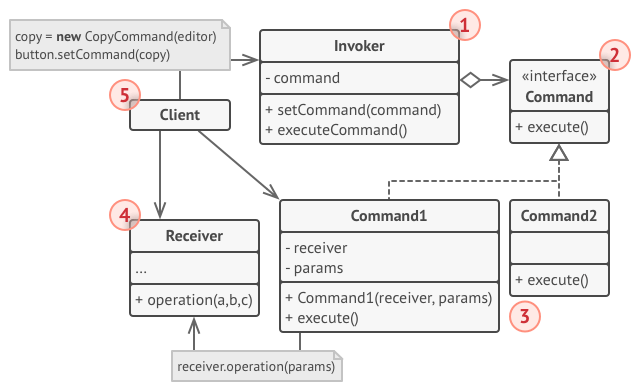

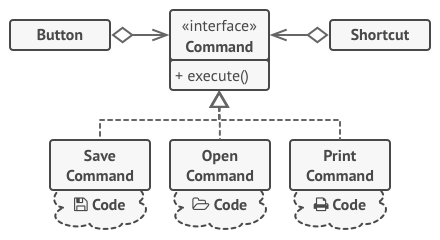

In [ ]:
from abc import ABCMeta, abstractmethod


class Troop:
    def move(self, direction: str) -> None:
        print('Отряд начал движение {}'.format(direction))

    def stop(self) -> None:
        print('Отряд остановился')


class Command(metaclass=ABCMeta):
    @abstractmethod
    def execute(self) -> None:
        pass

    @abstractmethod
    def unexecute(self) -> None:
        pass    


class AttackCommand(Command):
    def __init__(self, troop: Troop) -> None:
        self.troop = troop

    def execute(self) -> None:
        self.troop.move('вперед')

    def unexecute(self) -> None:
        self.troop.stop()


class RetreatCommand(Command):
    def __init__(self, troop: Troop) -> None:
        self.troop = troop

    def execute(self) -> None:
        self.troop.move('назад')

    def unexecute(self) -> None:
        self.troop.stop()


class TroopInterface:
    def __init__(self, attack: AttackCommand, retreat: RetreatCommand) -> None:
        self.attack_command = attack
        self.retreat_command = retreat
        self.current_command = None        # команда, выполняющаяся в данный момент

    def attack(self) -> None:
        self.current_command = self.attack_command
        self.attack_command.execute()

    def retreat(self) -> None:
        self.current_command = self.retreat_command
        self.retreat_command.execute()

    def stop(self) -> None:
        if self.current_command:
            self.current_command.unexecute()
            self.current_command = None
        else:
            print('Отряд не может остановиться, так как не двигается')


if __name__ == '__main__':
    troop = Troop()
    interface = TroopInterface(AttackCommand(troop), RetreatCommand(troop))
    interface.attack()
    interface.stop()
    interface.retreat()
    interface.stop()

## Итератор

**Итератор** - шаблон уровня объекта, предоставляющий механизм последовательного доступа к элементам объекта без раскрытия их внутреннего представления.

Применение:
- если нужно обеспечить доступ к содержимому составного объекта без раскрытия внутреннего представления
- требуется поддерживать несколько точек или способов обхода аргегата
- если должен быть создан унифицированный интерфейс обхода различных структур (например, for _ in some, где сам - любая итерируемая коллекция)

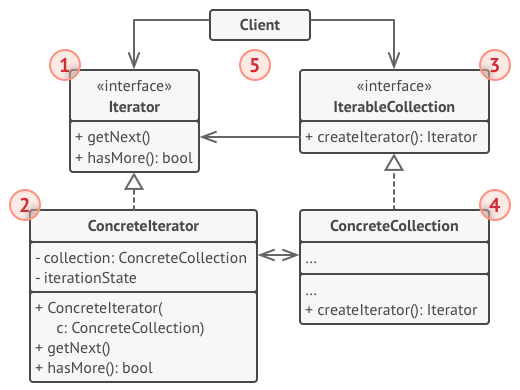

In [ ]:
from collections.abc import Iterable, Iterator
from typing import Any, List


class AlphabeticalOrderIterator(Iterator):
    def __init__(self, collection, reverse: bool = False) -> None:
        self._collection = collection
        self._reverse = reverse
        self._position = -1 if reverse else 0

    def __next__(self):
        try:
            value = self._collection[self._position]
            self._position += -1 if self._reverse else 1
        except IndexError:
            raise StopIteration()

        return value


class WordsCollection(Iterable):
    def __init__(self, collection: List[Any] = []) -> None:
        self._collection = collection

    def __iter__(self) -> AlphabeticalOrderIterator:
        return AlphabeticalOrderIterator(self._collection)

    def get_reverse_iterator(self) -> AlphabeticalOrderIterator:
        return AlphabeticalOrderIterator(self._collection, True)

    def add_item(self, item: Any):
        self._collection.append(item)


if __name__ == "__main__":
    collection = WordsCollection()
    collection.add_item("First")
    collection.add_item("Second")
    collection.add_item("Third")

    print("Straight traversal:")
    print(", ".join(collection))
    print()

    print("Reverse traversal:")
    print(", ".join(collection.get_reverse_iterator()), end="")

## Посредник (mediator)

**Посредник** - шаблог уровня объекта, абстрагирующий способ кооперирования большого числа объектов.

Применение:
- если нужно обеспечить слабую связность системы
- избавиться от множественных перекрестных ссылок
- если затруднено повторное использование объекта, активно участвующего в обмене даннымис другими объектами

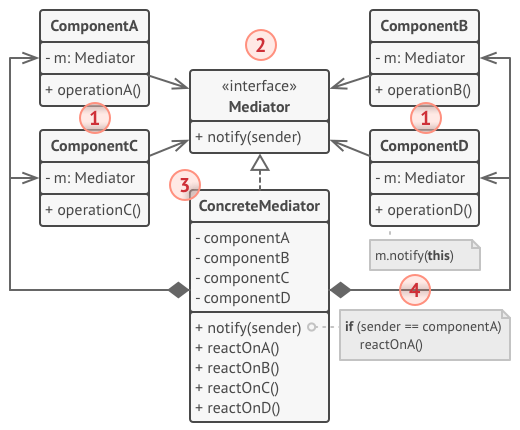

In [ ]:
from abc import ABC


class Mediator(ABC):
    def notify(self, sender: object, event: str) -> None:
        pass


class ConcreteMediator(Mediator):
    def __init__(self, component1, component2) -> None:
        self._component1 = component1
        self._component1.mediator = self
        self._component2 = component2
        self._component2.mediator = self

    def notify(self, sender: object, event: str) -> None:
        if event == "A":
            print("Mediator reacts on A and triggers following operations:")
            self._component2.do_c()
        elif event == "D":
            print("Mediator reacts on D and triggers following operations:")
            self._component1.do_b()
            self._component2.do_c()


class BaseComponent:
    def __init__(self, mediator: Mediator = None) -> None:
        self._mediator = mediator

    @property
    def mediator(self) -> Mediator:
        return self._mediator

    @mediator.setter
    def mediator(self, mediator: Mediator) -> None:
        self._mediator = mediator


class Component1(BaseComponent):
    def do_a(self) -> None:
        print("Component 1 does A.")
        self.mediator.notify(self, "A")

    def do_b(self) -> None:
        print("Component 1 does B.")
        self.mediator.notify(self, "B")


class Component2(BaseComponent):
    def do_c(self) -> None:
        print("Component 2 does C.")
        self.mediator.notify(self, "C")

    def do_d(self) -> None:
        print("Component 2 does D.")
        self.mediator.notify(self, "D")


if __name__ == "__main__":
    c1 = Component1()
    c2 = Component2()
    mediator = ConcreteMediator(c1, c2)

    print("Client triggers operation A.")
    c1.do_a()

    print("\n", end="")

    print("Client triggers operation D.")
    c2.do_d()

## Наблюдатель (observer)

**Наблюдатель** - шаблон уровня объекта, определяющий связь "1-много" для обновления всех объектов, зависимых от изменившегося объекта.

Применение:
- если есть односторонние связи между объектами, например: данные - представление
- если изменение состояния объекта может повлечь за собой изменение состояний заранее не известных объектов

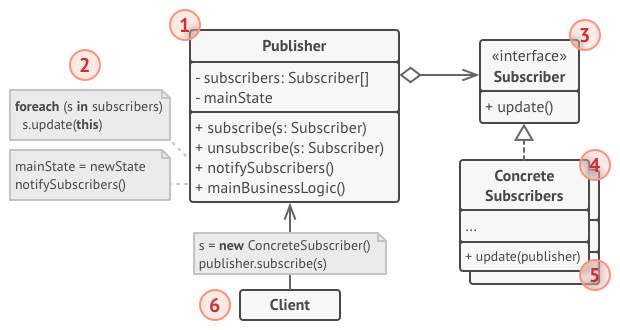

In [ ]:
from abc import ABCMeta, abstractmethod

class Observer(metaclass=ABCMeta):
    @abstractmethod
    def update(self, message: str) -> None:
        pass

    
class Observable(metaclass=ABCMeta):
    def __init__(self) -> None:
        self.observers = []     # инициализация списка наблюдателей

    def register(self, observer: Observer) -> None:
        self.observers.append(observer)

        
    def notify_observers(self, message: str) -> None:
        for observer in self.observers:
            observer.update(message)

class Newspaper(Observable):
    def add_news(self, news: str) -> None:
        self.notify_observers(news)

        
class Citizen(Observer):
    def __init__(self, name: str) -> None:
        self.name = name

    def update(self, message: str) -> None:
        print('{} узнал следующее: {}'.format(self.name, message))

        
if __name__ == '__main__':
    newspaper = Newspaper()                 # создаем небольшую газету
    newspaper.register(Citizen('Иван'))     # добавляем двух человек, которые
    newspaper.register(Citizen('Василий'))  # ... ее регулярно выписывают
    # ... и вбрасываем очередную газетную утку
    newspaper.add_news('Наблюдатель - поведенческий шаблон проектирования')

## Состояние

**Состояния** - шаблон уровня объекта, предоставляющий объекту изменять свое поведение с учетом текущего состояния.

Применение:
- если поведение объекта зависит от его текущего состояния
- если в системе есть многочисленные структурно идентичные условные операторы, в которых выбор ветви зависит от состояния объекта

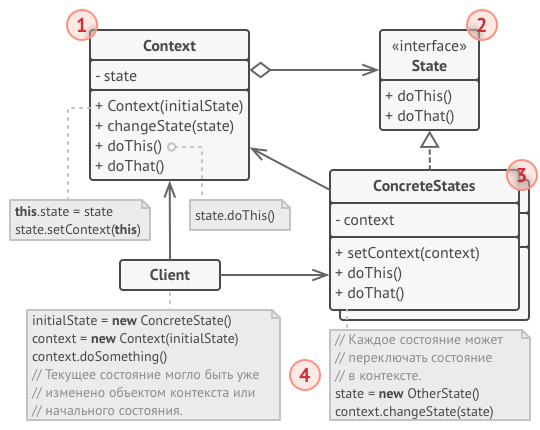

In [ ]:
from abc import ABC, abstractmethod


class Context(ABC):
    def __init__(self, state) -> None:
        self._state = None
        self.change_state(state)

    def change_state(self, state):
        print(f"Context: Transition to {type(state).__name__}")
        self._state = state
        self._state.context = self

    def request1(self):
        self._state.handle1()

    def request2(self):
        self._state.handle2()


class State(ABC):
    @property
    def context(self) -> Context:
        return self._context

    @context.setter
    def context(self, context: Context) -> None:
        self._context = context

    @abstractmethod
    def handle1(self) -> None:
        pass

    @abstractmethod
    def handle2(self) -> None:
        pass


class ConcreteStateA(State):
    def handle1(self) -> None:
        print("ConcreteStateA handles request1.")
        print("ConcreteStateA wants to change the state of the context.")
        self.context.change_state(ConcreteStateB())

    def handle2(self) -> None:
        print("ConcreteStateA handles request2.")


class ConcreteStateB(State):
    def handle1(self) -> None:
        print("ConcreteStateB handles request1.")

    def handle2(self) -> None:
        print("ConcreteStateB handles request2.")
        print("ConcreteStateB wants to change the state of the context.")
        self.context.change_state(ConcreteStateA())


if __name__ == "__main__":
    context = Context(ConcreteStateA())
    context.request1()
    context.request2()

## Стратегия

**Стратегия** - шаблон, определеяющий семейство алгоритмов, инкапсулирующий каждый из них в отдельный класс и делающий эти классы взаимозаменяемыми.

Применение:
- если множество родственных классов отличаются только поведением
- если необходимо несколько реализаций одного и того же алгоритма - например, при выборе процессора или видеокарты для расчетов
- если нежелательно раскрывать клиенту используемые структуры данных
- если класс содержит множество вариантов поведения, основанных на ветвлении

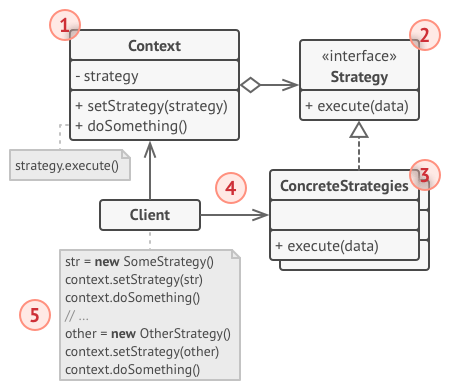

In [ ]:
class People(object):
    def __init__(self, name, tool):
        self.name = name
        self.setTool(tool)
    
    def setTool(self, tool):
        self.tool = tool
    
    def write(self, text):
        self.tool.write(self.name, text)
    

class ToolBase:
    """
    Семейство алгоритмов `Инструмент написания`
    """
    def write(self, name, text):
        raise NotImplementedError()
    
    
class PenTool(ToolBase):
    """Ручка"""
    def write(self, name, text):
        print('%s (ручкой) %s' % (name, text))
    
    
class BrushTool(ToolBase):
    """Кисть"""
    def write(self, name, text):
        print('%s (кистью) %s' % (name, text))
    

class Student(People):
    """Студент"""
    tool = PenTool()
    
    
class Painter(People):
    """Художник"""
    tool = BrushTool()


maxim = Student(u'Максим', PenTool())
maxim.write(u'Пишу лекцию о паттерне Стратегия')

sasha = Painter(u'Саша', BrushTool())
sasha.write(u'Рисую иллюстрацию к паттерну Стратегия')

print()
sasha.setTool(PenTool())
sasha.write(u'Нет, уж лучше я напишу конспект')

## Посетитель

**Посетитель** - шаблон уровня объекта, который позволяет добавлять в программу новые операции, не изменяя классы объектов, над которыми эти операции могут выполняться.

Применение:
- когда нужно определить новую операцияю над объектами класса, не меняя класс
- если в структуре есть объекты разных классов, над которыми требуется выполнять операции, зависящие от класса
- вид классов структуры стабилен, но постоянно пополняется новыми операциями

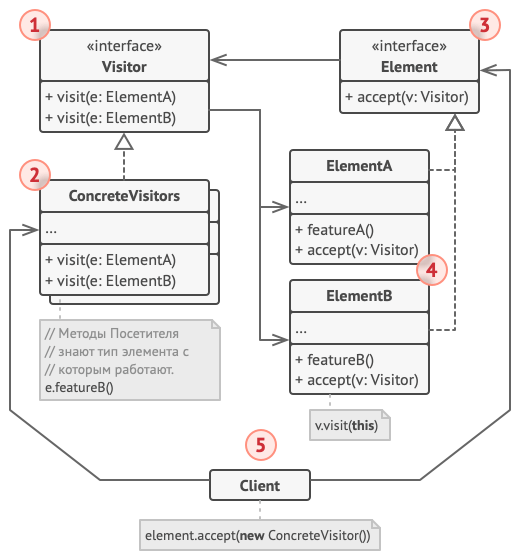

In [ ]:
from abc import ABC, abstractmethod
from typing import List


class Component(ABC):
    @abstractmethod
    def accept(self, visitor) -> None:
        pass


class ConcreteComponentA(Component):
    def accept(self, visitor) -> None:
        visitor.visit_concrete_component_a(self)

    def exclusive_method_of_concrete_component_a(self) -> str:
        return "A"


class ConcreteComponentB(Component):
    def accept(self, visitor):
        visitor.visit_concrete_component_b(self)

    def special_method_of_concrete_component_b(self) -> str:
        return "B"



class ConcreteVisitor1:
    def visit_concrete_component_a(self, element) -> None:
        print(f"{element.exclusive_method_of_concrete_component_a()} + ConcreteVisitor1")

    def visit_concrete_component_b(self, element) -> None:
        print(f"{element.special_method_of_concrete_component_b()} + ConcreteVisitor1")


class ConcreteVisitor2:
    def visit_concrete_component_a(self, element) -> None:
        print(f"{element.exclusive_method_of_concrete_component_a()} + ConcreteVisitor2")

    def visit_concrete_component_b(self, element) -> None:
        print(f"{element.special_method_of_concrete_component_b()} + ConcreteVisitor2")


def client_code(components: List[Component], visitor) -> None:
    for component in components:
        component.accept(visitor)


if __name__ == "__main__":
    components = [ConcreteComponentA(), ConcreteComponentB()]

    print("The client code works with all visitors via the base Visitor interface:")
    visitor1 = ConcreteVisitor1()
    client_code(components, visitor1)

    print("It allows the same client code to work with different types of visitors:")
    visitor2 = ConcreteVisitor2()
    client_code(components, visitor2)